## Cleaning and exploration of medical insurance data

#### Importing required modules

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

#### Reading and describing the data

In [16]:
df = pd.read_csv("medical_insurance.csv")

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Checking for null values

In [18]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of", feature)
    print(df[feature].value_counts())
    print("\n")

Distribution of sex
male      1406
female    1366
Name: sex, dtype: int64


Distribution of smoker
no     2208
yes     564
Name: smoker, dtype: int64


Distribution of region
southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64




In [21]:
df.groupby(['sex']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})


charges                      bmi        age
         count          mean       mean       mean
sex                                               
female    1366  12486.831977  30.434473  39.481698
male      1406  14013.872721  30.960633  38.748222

In [22]:
df.groupby(['children']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
           count          mean       mean       mean
children                                            
0           1186  12317.920881  30.628508  38.431703
1            672  12722.650521  30.705744  39.300595
2            496  15268.182723  31.035806  39.286290
3            324  15304.070620  30.580000  41.395062
4             52  13550.983876  31.314615  38.769231
5             42   8706.036629  28.915000  35.904762

In [23]:
df.groupby(['region']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
            count          mean       mean       mean
region                                               
northeast     658  13475.874737  29.157781  39.243161
northwest     664  12463.129315  29.147259  39.081325
southeast     766  14748.777706  33.478773  38.762402
southwest     684  12164.196435  30.584503  39.397661

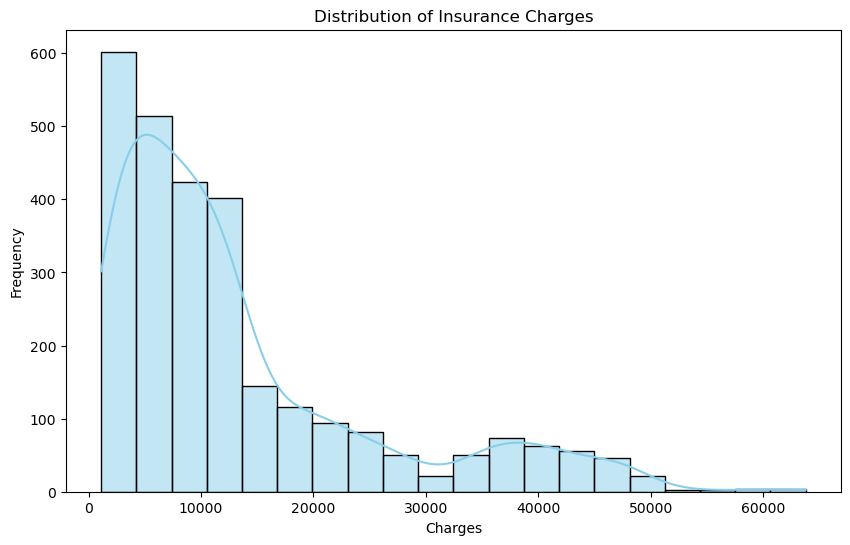

In [24]:
sns.histplot(df['charges'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

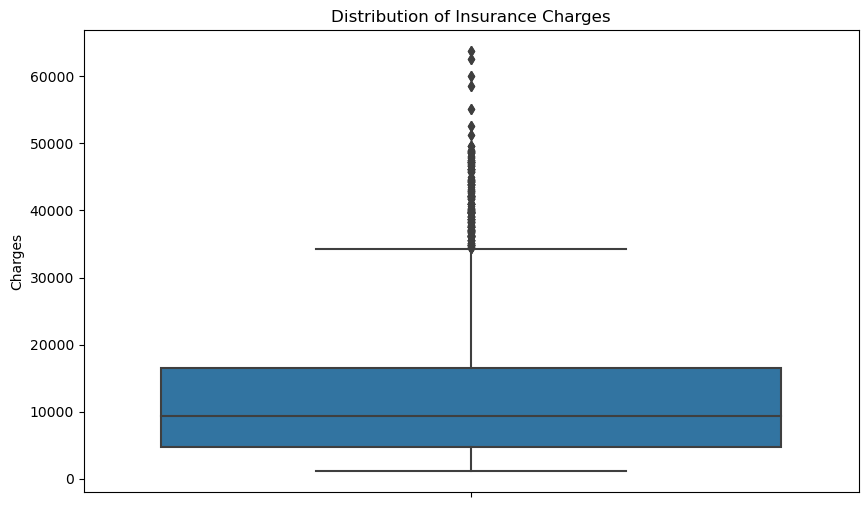

In [25]:
sns.boxplot(y='charges', data=df)
plt.title('Distribution of Insurance Charges')
plt.ylabel('Charges')
# plt.ylabel('Frequency')
plt.show()

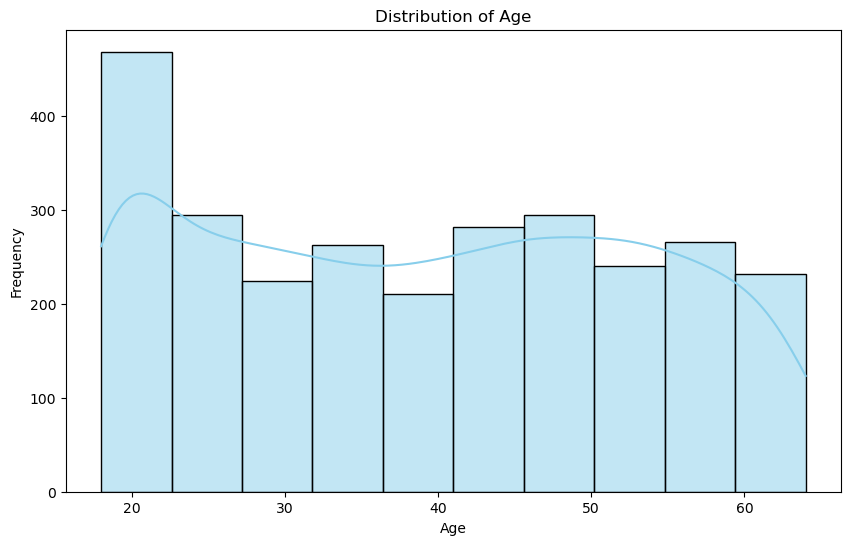

In [26]:
sns.histplot(df['age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

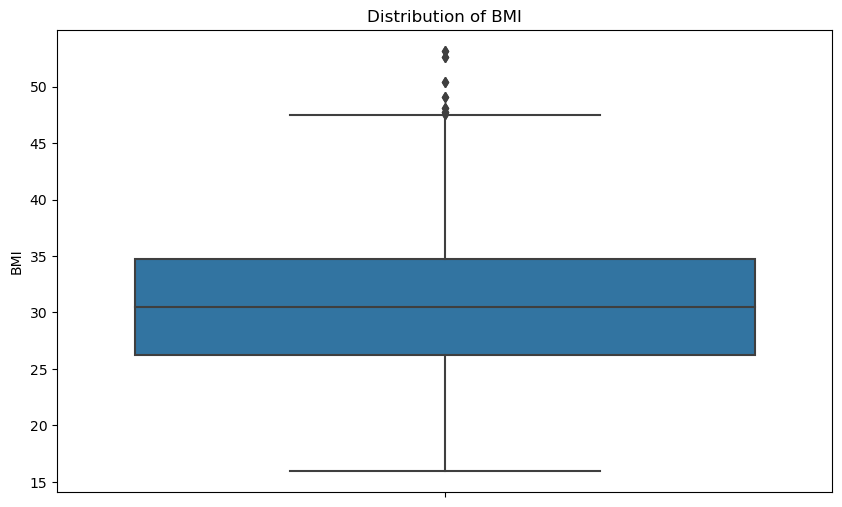

In [27]:
sns.boxplot(y='bmi', data=df)
plt.title('Distribution of BMI')
plt.ylabel('BMI')
# plt.ylabel('Frequency')
plt.show()

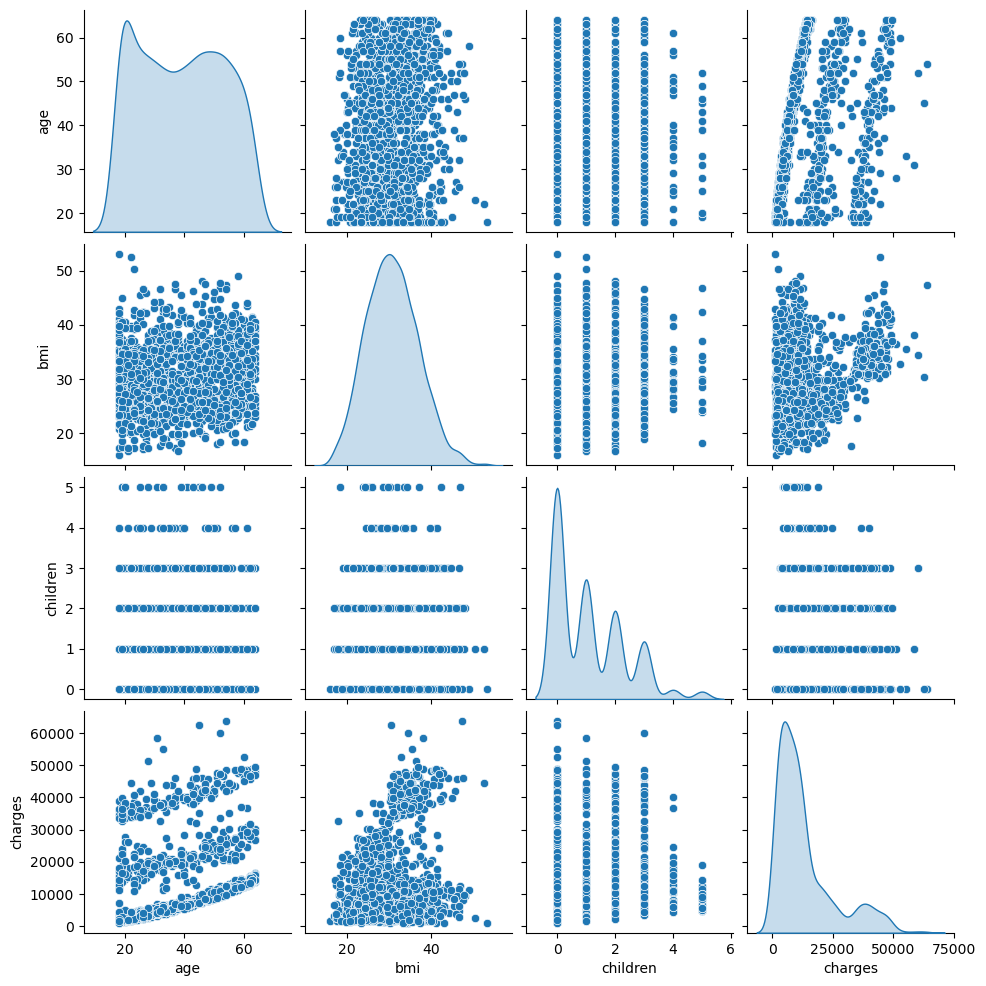

In [28]:
sns.pairplot(df, diag_kind='kde')
plt.show()